$\Large\textbf{1. Access Model Training History in Keras}$

Keras provides the capability to register callbacks when training a deep learning model.

One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. This includes the loss and the accuracy (for classification problems) as well as the loss and accuracy for the validation dataset, if one is set.

The history object is returned from calls to the **fit()** function used to train the model. Metrics are stored in a dictionary in the history member of the object returned. We can use the data collected in the history object to create plots.

The plots can provide an indication of useful things about the training of the model, such as:

$\bullet$ It’s speed of convergence over epochs (slope).

$\bullet$ Whether the model may have already converged (plateau of the line).

$\bullet$ Whether the mode may be over-learning the training data (inflection for validation line).

And more.

In [1]:
#Tutorial from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.


$\Large\textbf{2. Visualize Model Training History in Keras}$
We can create plots from the collected history data.

In the example below we create a small network to model the Pima Indians onset of diabetes binary classification problem. This is a small dataset available from the UCI Machine Learning Repository.

The example collects the history, returned from training the model and creates two charts:

1) A plot of accuracy on the training and validation datasets over training epochs.

2) A plot of loss on the training and validation datasets over training epochs.

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


The plots are provided below. The history for the validation dataset is labeled test by convention as it is indeed a test dataset for the model.

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

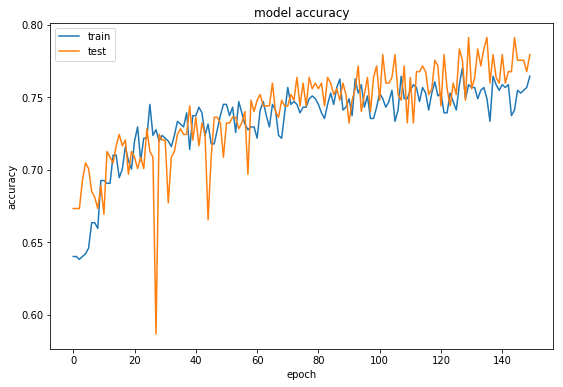

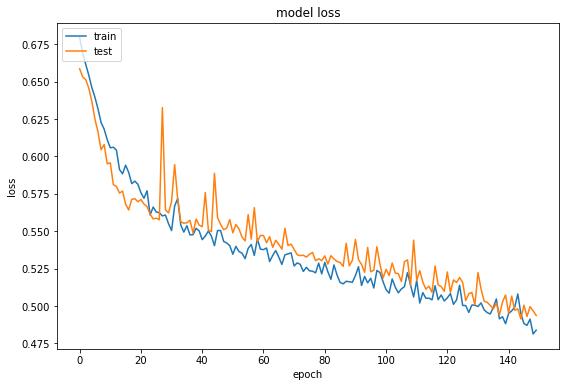

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

After analyzing the performance of the model we can try to compute more epochs, change the number of neurons or layers, etc. It is important to recompile the model before running the fit again. Otherwise, the **fit()** function will start with the previous computed weights, and this may lead to overfitting. 

Below we try again with more epochs and a few more neurons.

In [5]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=10, verbose=0)

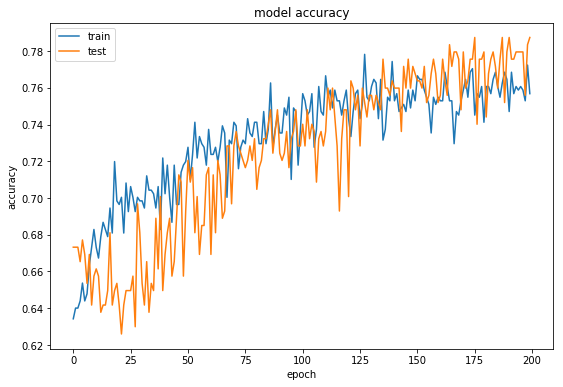

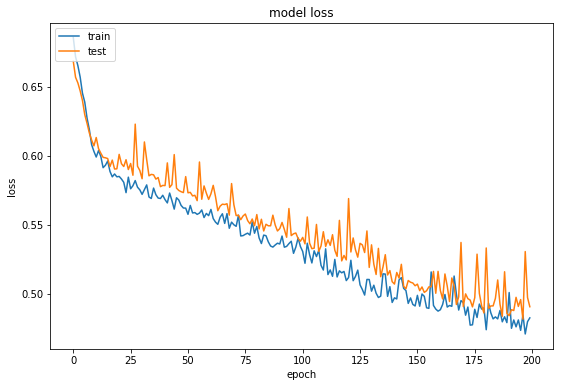

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Notice how the accuracy of the model is starting to stabilize, althought the loss is still decreasing. This could indicate that running more epochs will leave to overfitting and this indeed a good point to stop. 